In [3]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.4 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt

In [5]:
df = pd.read_csv('/content/diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [9]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [10]:
# Splitting Data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without Hyperparameter

In [12]:
X_train_scaled.shape

(614, 8)

In [13]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.5750 - loss: 2.8755 - val_accuracy: 0.6039 - val_loss: 0.9913
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6246 - loss: 1.1195 - val_accuracy: 0.6494 - val_loss: 0.7655
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6699 - loss: 0.7801 - val_accuracy: 0.6104 - val_loss: 0.7171
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6887 - loss: 0.6276 - val_accuracy: 0.6364 - val_loss: 0.6794
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6797 - loss: 0.6298 - val_accuracy: 0.6364 - val_loss: 0.6587
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6652 - loss: 0.6589 - val_accuracy: 0.6558 - val_loss: 0.6593
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6925 - loss: 0.6008 - val_accuracy: 0.6753 - val_loss: 0.6698
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6915 - loss: 0.5674 - val_accuracy: 0

# With Hyperparameter Tuning using Keras Tuner

In [ ]:
# value for optimizer
# value for layers
# value for nodes
# apply dropout

In [95]:
def build_model(hp):

  model = Sequential()
  counter = 1
  # Choosing best number of layers
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    if counter == 1:
        model.add(Dense(
            hp.Int('unit' + str(i),min_value=8,max_value=128,step=3),
            activation=hp.Choice('active' + str(i),values=['relu','tanh','sigmoid','elu','selu']),
            input_dim=8,
          kernel_regularizer = tensorflow.keras.regularizers.L2(hp.Choice('regular'+str(i),values=[0.1,0.2,0.3,0.001,0.002,0.003,0.01,0.02,0.03]))
            )
        )

    else:
        model.add(Dense(
            hp.Int('unit' + str(i),min_value=8,max_value=128,step=3),
            activation=hp.Choice('active' + str(i),values=['relu','tanh','sigmoid','elu','selu']),
            kernel_regularizer = tensorflow.keras.regularizers.L2(hp.Choice('regular'+str(i),values=[0.1,0.2,0.3,0.001,0.002,0.003,0.01,0.02,0.03]))
            )
        )
    counter += 1

  model.add(Dense(1,activation='sigmoid'))

  # Choosing best optimizer
  optimizer = hp.Choice('optimizer', values = ['adam', 'sgd','rmsprop'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])


  return model

In [96]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials = 5,
    directory = 'mydir',
    project_name = 'final'

)

Reloading Tuner from mydir/final/tuner0.json


In [97]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [98]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'unit0': 78,
 'active0': 'elu',
 'optimizer': 'adam',
 'unit1': 38,
 'active1': 'tanh',
 'unit2': 83,
 'active2': 'relu',
 'unit3': 63,
 'active3': 'relu',
 'unit4': 118,
 'active4': 'elu',
 'unit5': 108,
 'active5': 'relu',
 'unit6': 58,
 'active6': 'elu',
 'unit7': 33,
 'active7': 'relu',
 'unit8': 43,
 'active8': 'relu',
 'unit9': 8,
 'active9': 'relu'}

In [99]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [100]:
history = model.fit(X_train,y_train,initial_epoch=5,epochs=200,validation_data=(X_test,y_test))

Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6334 - loss: 2.2726 - val_accuracy: 0.6883 - val_loss: 2.1312
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6431 - loss: 2.1927 - val_accuracy: 0.5649 - val_loss: 1.9873
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6571 - loss: 1.9042 - val_accuracy: 0.6883 - val_loss: 1.8367
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6691 - loss: 1.7393 - val_accuracy: 0.6818 - val_loss: 1.7188
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6973 - loss: 1.6824 - val_accuracy: 0.7208 - val_loss: 1.6534
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7163 - loss: 1.5564 - val_accuracy: 0.6948 - val_loss: 1.6415
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7095 - loss: 1.5590 - val_accuracy: 0.6429 - val_loss: 1.5156
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6696 - loss: 1.5247 - val_accuracy: 0.694

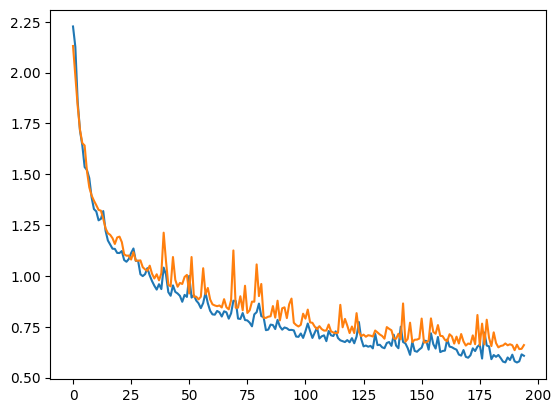

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

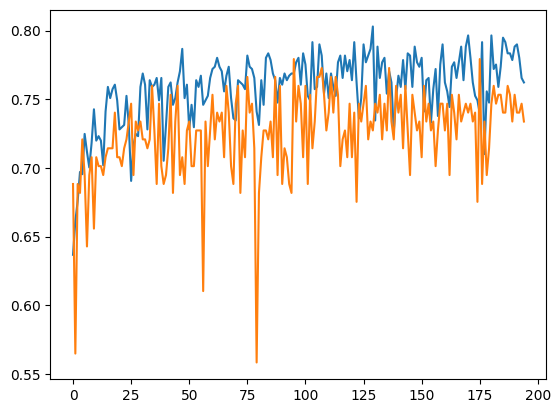

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])